
# Project: Investigate a Dataset - [TMDb Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
#### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

* Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
* There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
* The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Dataset Description 

I have a csv file contains the data we are going to analyze

### Question(s) for Analysis
What is the significant of vote_average on runtime, genres, and directors.

In [1]:
# import statements for all of the packages that I will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# check to see the last 5 columns and rows of the dataset
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
# exploring the shape of the data
df.shape

(10866, 21)

The data consist of 10866 rows and 21 columns

In [6]:
# inspect data types and look for instances of missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies has missing data.

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


* The mean vote average is 1.5
* The maximum vote average is 8.7
* Our budget and revenue showing 0 is an indication that the column was not inputed correctly. 


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [8]:
# I will probably won't need the homepage, tagline, keywords, overview
df.drop(['homepage', 'tagline', 'keywords', 'overview', 'production_companies'], axis = 1, inplace = True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
# the sum of null values in each colu
df.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

imdb, cast, director, genres contain null values

In [10]:
# checking the duplicate
df.duplicated().sum()

1

I have only on duplicate

In [11]:
# dropping the duplicate
df.drop_duplicates(inplace=True)

In [12]:
# checking the null values with imdb_id
df[df.imdb_id.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,8/10/15,12,7.5,2015,0.000000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,10/3/14,13,6.8,2014,0.000000,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,Frank Paur,38,Animation|Action|Science Fiction,1/27/09,38,6.9,2009,0.000000,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,Sam Liu,41,Action|Animation|Fantasy|Science Fiction,1/27/09,38,6.4,2009,0.000000,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",NaN,163,Music,9/21/10,10,8.6,2010,0.000000,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,60,NaN,12/25/12,10,7.8,2012,0.000000,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,120,Comedy,9/23/12,15,6.4,2012,0.000000,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,Connor McGuire|Colin McGuire,7,Action|Science Fiction,10/8/13,11,7.5,2013,468.016676,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,Mikael Salomon,80,Action|Adventure|Drama|Fantasy|Family,1/1/07,11,7.3,2007,0.000000,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,Mikael Salomon,80,Adventure|Fantasy|Drama|Action|Science Fiction,1/1/07,13,7.0,2007,0.000000,0.0


In [13]:
# droping the null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10726 entries, 0 to 10865
Data columns (total 16 columns):
id                10726 non-null int64
imdb_id           10726 non-null object
popularity        10726 non-null float64
budget            10726 non-null int64
revenue           10726 non-null int64
original_title    10726 non-null object
cast              10726 non-null object
director          10726 non-null object
runtime           10726 non-null int64
genres            10726 non-null object
release_date      10726 non-null object
vote_count        10726 non-null int64
vote_average      10726 non-null float64
release_year      10726 non-null int64
budget_adj        10726 non-null float64
revenue_adj       10726 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB


after droping the null values, my rows was reduce to 10726 from 10865 and columns from 21 to 16 from the initial total rows and columns

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 What is the relationship between runtime and vote average

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# checking the mean of runtime
rt = df.runtime.mean()
print(rt)

102.49366026477718


In [15]:
#sorting runtime
rsorted = df.sort_values('runtime', ascending = False)

In [16]:
#sorting runtime from the highest
rsorted.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900,Documentary,9/3/11,14,9.2,2011,0.0,0.000000e+00
4041,150004,tt0289830,0.469332,0,0,Taken,Dakota Fanning|Matt Frewer|Eric Close|Emily Be...,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,877,Science Fiction,12/2/02,38,6.8,2002,0.0,0.000000e+00
2722,331214,tt0185906,0.537593,0,125000000,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,Phil Alden Robinson|Richard Loncraine|Mikael S...,705,Action|Drama|War,9/9/01,313,8.0,2001,0.0,1.539360e+08
6176,42044,tt0090015,0.147489,0,0,Shoah,Simon Srebnik|Michael Podchlebnik|Motke Zaidl,Claude Lanzmann,566,Documentary,11/1/85,16,8.3,1985,0.0,0.000000e+00
6894,192040,tt0795176,0.137913,0,0,Planet Earth,David Attenborough,Alastair Fothergill,550,Documentary,12/10/06,65,7.6,2006,0.0,0.000000e+00


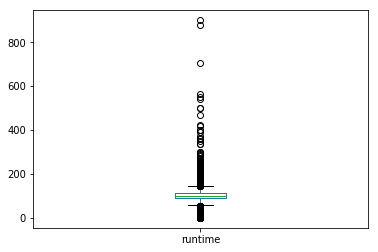

In [17]:
# using box to plot rsorted.runtime
rsorted.runtime.plot(kind = 'box')

In [18]:
#calculating mean of vote_average
x = df.vote_average.mean()
print(x)

5.964217788551184


In [19]:
# sorting vote_average
vsorted = df.sort_values('vote_average', ascending = False)

In [20]:
#sorting vote average from the highest
vsorted.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900,Documentary,9/3/11,14,9.2,2011,0.0,0.0
1200,374430,tt3973198,0.129531,0,0,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,Carl Tibbetts,74,Drama|Horror|Mystery|Science Fiction|Thriller,12/16/14,41,8.8,2014,0.0,0.0
6911,24970,tt0110758,0.212010,0,0,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,David Mallet,145,Music,7/9/06,23,8.7,2006,0.0,0.0
3690,68450,tt1646967,0.321341,0,0,The Art of Flight,Travis Rice|Nicolas Muller|Mark Landvik|Jake B...,Curt Morgan,80,Adventure|Documentary,9/8/11,60,8.5,2011,0.0,0.0
8221,55676,tt0112120,0.194889,0,0,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Brian De Palma|Gregory Peck|Fr...,Martin Scorsese|Michael Henry Wilson,225,Documentary,5/21/95,11,8.5,1995,0.0,0.0


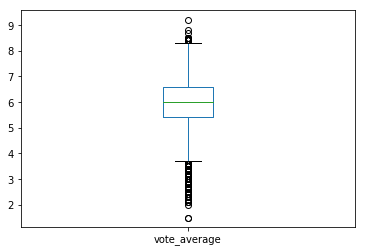

In [21]:
# using box to plot vsorted.vote_average
vsorted.vote_average.plot(kind = 'box')

In [22]:
# calculating the vote average mean using mean of runtime
# want to check if runtime is greater than 103 
vam = df[df.runtime >= 103].vote_average.mean()
print(" The vote average mean greater than 103 is : ", vam)

 The vote average mean greater than 103 is :  6.265058611361588


In [23]:
# calculating the vote average mean using mean of runtime
# want to check if runtime is less than 103
vam = df[df.runtime <= 103].vote_average.mean()
print("The vote average mean lesser than 103 is : ",vam)

The vote average mean lesser than 103 is :  5.761778735190029


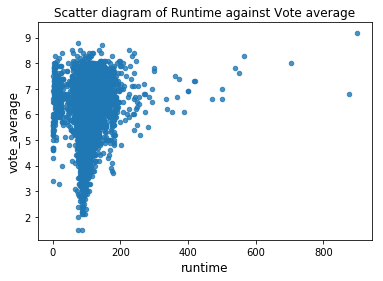

In [24]:
# plotting runtime against vote_average using scatter diagram
df.plot(kind = 'scatter', x = 'runtime', y = 'vote_average', alpha = 0.8)
plt.title('Scatter diagram of Runtime against Vote average', fontsize = 12)
plt.xlabel('runtime', fontsize = 12)
plt.ylabel('vote_average', fontsize = 12)
plt.legend()
plt.show()

There is no significant correlation between runtime and vote average. It can not be concluded that runtime of a movie has relationship with the how the moving rated or the vote average.

### Research Question 2. what is the signicant of vote_average to genres

In [25]:
# checking the highest and lowest genres
df.sort_values('vote_average', ascending = False).groupby('genres').genres.head(1)

3894                                        Documentary
1200      Drama|Horror|Mystery|Science Fiction|Thriller
6911                                              Music
3690                              Adventure|Documentary
8839                                             Comedy
                             ...                       
9388                 Fantasy|Drama|Horror|Action|Comedy
3109                      Action|Family|Science Fiction
5682                     Action|Adventure|Drama|Fantasy
6541       Drama|Horror|Comedy|Thriller|Science Fiction
3132    Adventure|Action|Fantasy|Horror|Science Fiction
Name: genres, Length: 2020, dtype: object

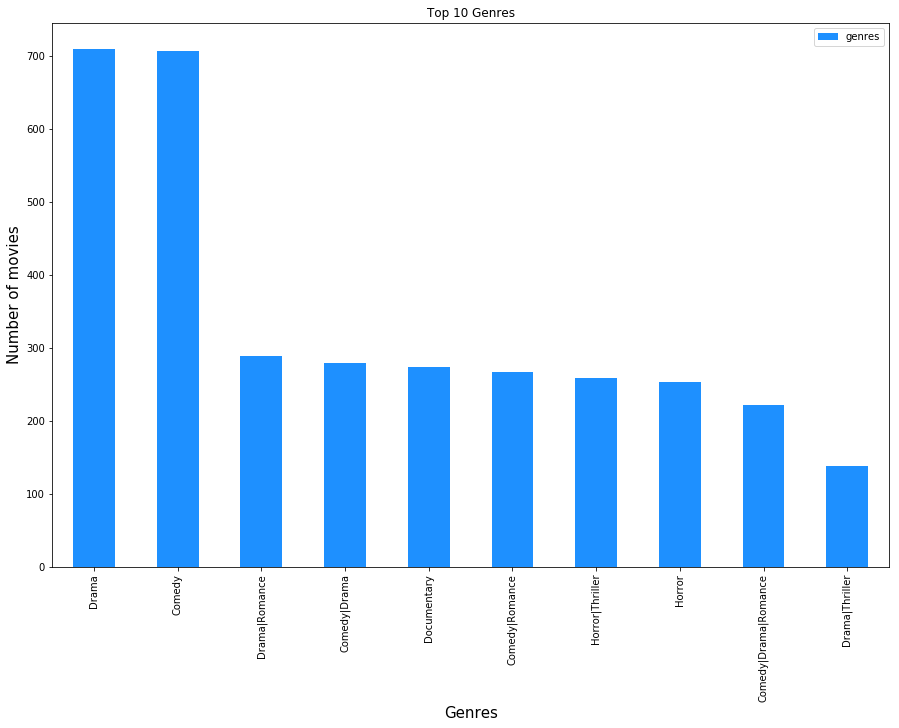

In [26]:
# counting the number of movies in each genres(the top 10 is shown)
df['genres'].value_counts().head(10).plot.bar(figsize=(15,10),color = 'dodgerblue', title = 'Top 10 Genres')
plt.xlabel('Genres', fontsize = 15)
plt.ylabel('Number of movies', fontsize = 15)
plt.legend()
plt.show()

The top genres are Drama, comedy, drama|Romance, Comedy|Drama, Documentary.

In [27]:
# calculating the mean of genre using vote_average aggregate 
average_v = df.groupby('genres').vote_average.agg(['mean'])
average_v[average_v['mean'] >=8]

,mean
genres,
Drama|Horror|Mystery|Science Fiction|Thriller,8.8
Fantasy|Drama|Crime,8.0
History|Drama|Thriller|War,8.0
Music|Drama|Fantasy|Romance,8.4
Mystery|Documentary|Crime,8.0
Romance|Comedy|Animation|Drama|Family,8.0
Thriller|Documentary,8.2


Drama|Horror|Mystery|Science Fiction|Thriller has the highest mean vote_average with 8.8

### Research Question 3. Does directors with highest number of movies directed have highest profit and movie vote average?

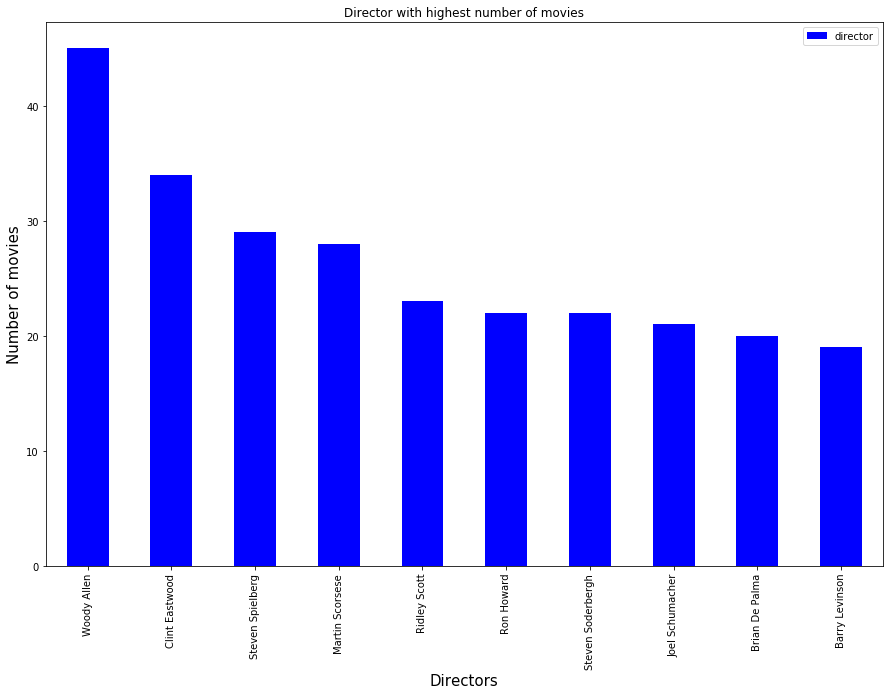

In [28]:
# counting the number of movies of each director(the top 10 is shown)
df['director'].value_counts().head(10).plot.bar(figsize=(15,10),color = 'blue' , title = 'Director with highest number of movies')
plt.xlabel('Directors', fontsize = 15)
plt.ylabel('Number of movies', fontsize = 15)
plt.legend()
plt.show()

##### Top 10 directors with highest number of movies directed

In [29]:
# calculating the mean of movies directed using vote_average aggregate 
average_v = df.groupby('director').vote_average.agg(['mean'])
average_v[average_v['mean'] >=8.5]

,mean
director,
Curt Morgan,8.5
David Mallet,8.7
Mark Cousins,9.2
Martin Scorsese|Michael Henry Wilson,8.5
Saul Swimmer,8.5


Top 5 directors having highest vote_average

In [30]:
# sorting the vote average ascendingly to get the top directors with hihest vote average.
df.sort_values('vote_average', ascending = False).director.head(10)

3894                            Mark Cousins
1200                           Carl Tibbetts
6911                            David Mallet
3690                             Curt Morgan
8221    Martin Scorsese|Michael Henry Wilson
8839                             Stan Lathan
8411                            Saul Swimmer
5923                         Anthony Mandler
7948                          Jonathan Demme
5986                  Jorge RamÃ­rez SuÃ¡rez
Name: director, dtype: object


None of the directors in the top 10 number of movies directed are in top 10 movie vote average

## Conclusion

* There is little or no relationship between runtime and vote_average.
* There is signicant relationship between genres and vote average.
* There is no relationship betweeen the number of movies a director released to the vote average or rating of a movie.
* Additionally, further research should be conducted to find out the profit make each year on the movies released.

## Limitation

* There is a little knowledge on my part to actualize what I wanted to work on. So, I just make it simple. Surely, as I continue in the program I will come back to the project and do what I wanted to do. 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0